In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from itertools import product

from sailing import SailingGridworld
from common import helper as h

In [2]:
gamma = 0.9
eps = 1e-4 # TODO: use this value for Task 2 and Task 3
value_update_iter = 100 # TODO: change this in Task 2
rock_penalty = -10 # TODO: change this in Q1.3 # rock_penalty = -10

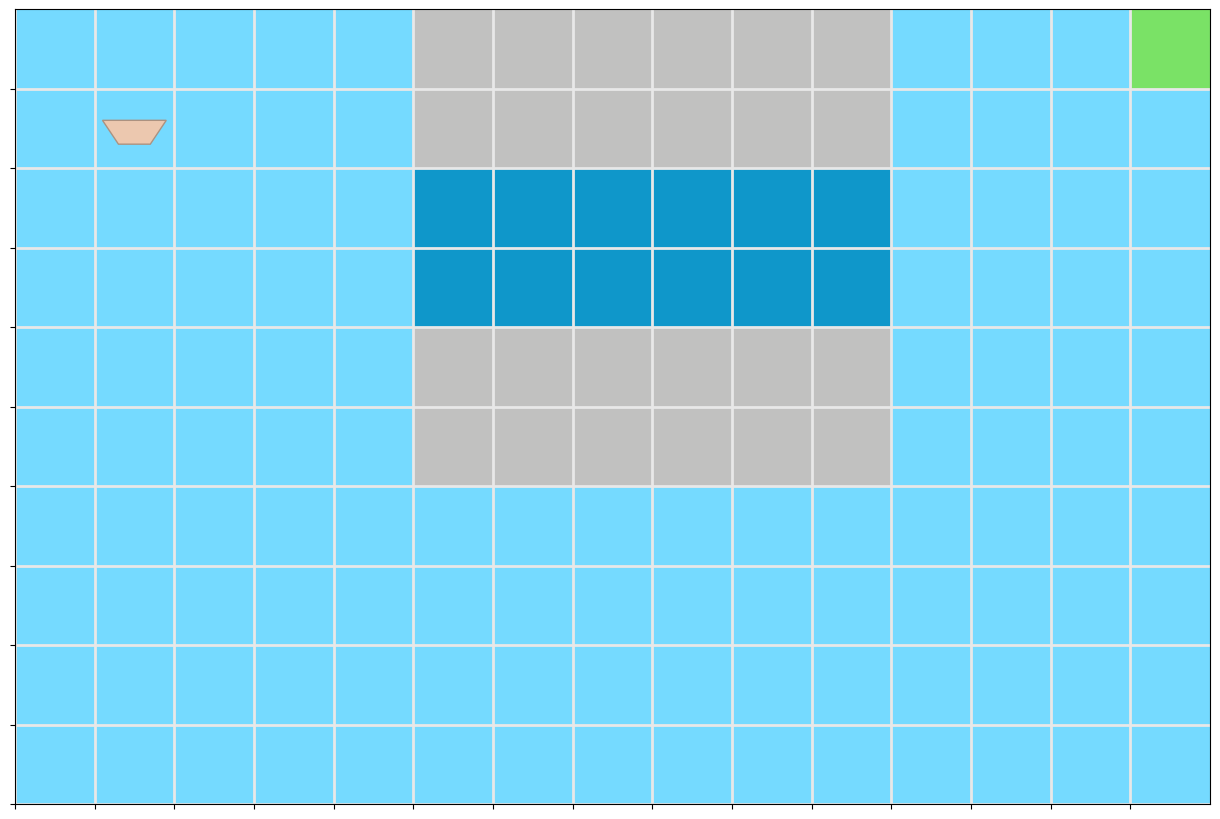

In [3]:
# Set up the environment
env = SailingGridworld(rock_penalty=rock_penalty, value_update_iter=value_update_iter)

In [4]:

from webbrowser import get


def get_values_policy(iterations):
    v_est = np.zeros((env.w, env.h))
    policy = np.zeros((env.w, env.h))
    env.draw_values_policy(v_est, policy)

    last_change = 0 # Sign the last time that the policy has changed
    first = True 
    
    for i in range(iterations):
        if i % 20 == 0:
            print(f"Iteration: {i}/100")
        # TODO: Task 1, implement the value iteration and policy
        # TODO: Task 2, convergency of the value function and policy

        ########## Your code starts here ##########
        temp_value = np.zeros((env.w, env.h))
        temp_policy = np.zeros((env.w, env.h))

        for x in range(env.w):
            for y in range(env.h):
                value_list = np.zeros(env.n_actions)
                for action in range(env.n_actions):
                    transitions = env.transitions[x, y, action]
                    action_value = 0 
                    for transition in transitions:
                        next_state, reward, done, prob = transition.state, transition.reward, transition.done, transition.prob
                        if done: 
                            action_value += prob * reward
                            continue
                        action_value += prob * (reward + gamma * v_est[next_state[0], next_state[1]]) 
                    value_list[action] = action_value
                next_value = np.max(value_list)
                temp_value[x, y] = next_value
                temp_policy[x, y] = np.argmax(value_list)
        
        # value function convergence
        delta = np.abs(v_est - temp_value).max()
        if delta < eps and i > 0 and first:
            first = False
            print(f"Value function has converged during iteration: {i}")
            
        v_est = temp_value

        # Policy convergence
        if np.array_equal(temp_policy, policy) == False: 
            last_change = i
        policy = temp_policy

        env.draw_values_policy(v_est, policy)
        
        if i +1 == iterations:
            print(f"The last change in the policy is: {last_change}")
        ########## Your code ends here ##########

    return v_est, policy


In [5]:
# value iteration -- update value estimation and policy
value_est, policy = get_values_policy(iterations=value_update_iter)

Iteration: 0/100


In [ ]:
# Eval policy
N = 1000 # TODO: change for task 4
returns = list()

for ep in range(N):
    if (ep + 1) % 200 == 0: 
        print(f"Episodes {ep+1}/{N}")
    state = env.reset()
    done = False

    rewards = list()
    
    while not done:

        ########## You code starts here ##########

        # TODO: Use the policy to take the optimal action (Task 1)
        
        action = policy[state[0], state[1]]

        # Take a step in the environment
        state, reward, done, _ = env.step(action)
        
        # TODO: Calculate discounted return for the initial state
        rewards.append(reward)
        if done: 
            G = np.sum(np.array([(gamma**i) * rew for i,rew in enumerate(rewards)]))
            returns.append(G)

        #env.reset()

returns = np.array(returns)
print(f"The mean return of {N} episodes is: {np.mean(returns):.2f} ")
print(f"The standard deviation return of {N} episodes is: {np.std(returns):.2f} ")
                
                            ########## You code ends here ##########


In [ ]:
# save value and policy
h.save_object({'value': value_est, 'policy': policy}, './value_policy.pkl')